## Linear models for Classification

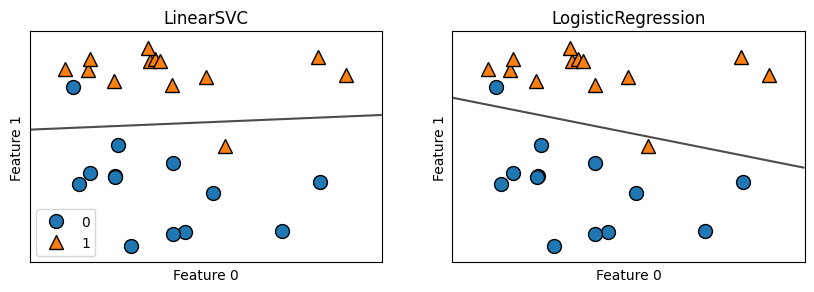

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt


X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                            ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

### Breast Cancer Dataset

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, 
    random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.958
Test set score: 0.958


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting. Let's try to increase C to fit a more flexible model:

In [5]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.981
Test set score: 0.965


Using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intuition that a more complex model should perform better.
We can also investigate what happens if we use an even more regularized model than the default of C=1, by setting C=0.01:

In [7]:
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set score: 0.953
Test set score: 0.951


### Linear models for multiclass classification

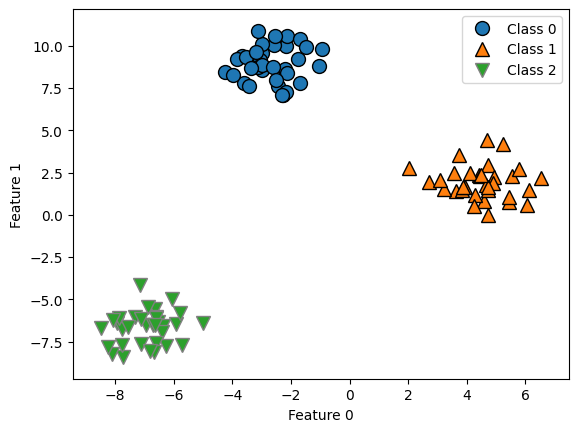

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

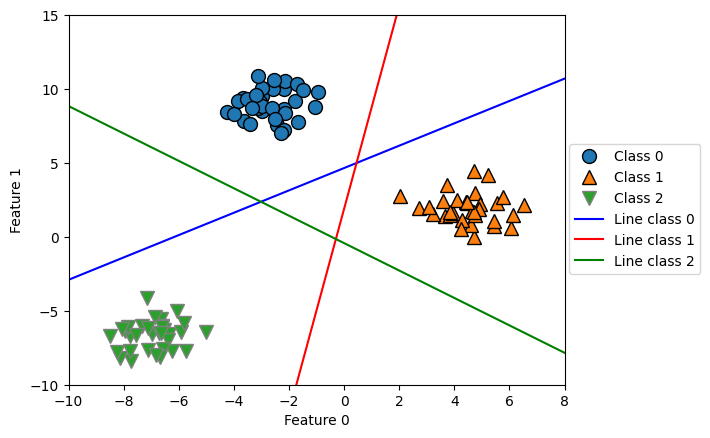

In [12]:
linear_svm = LinearSVC().fit(X, y)

import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))

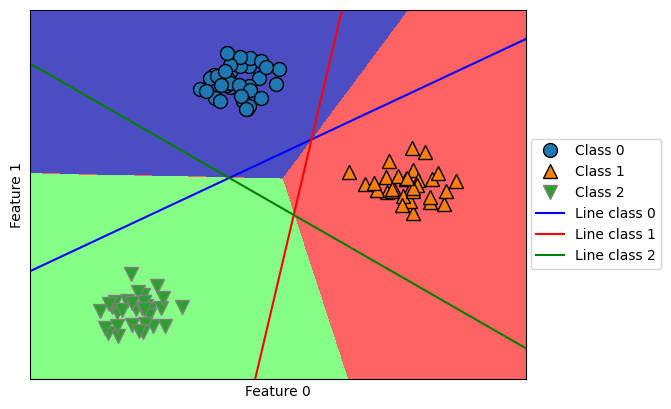

In [14]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                      ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")